In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Ganguly_tests.xlsx')

In [4]:
df

,Inning,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
0,1,131,435,301,20,0,43.52,3,bowled,2,v England,Lord's,1996-06-20
1,2,136,361,268,17,2,50.74,3,caught,1,v England,Nottingham,1996-07-04
2,3,48,121,86,8,0,55.81,3,bowled,3,v England,Nottingham,1996-07-04
3,4,66,190,154,10,1,42.85,3,caught,2,v Australia,Delhi,1996-10-10
4,5,21,56,29,3,0,72.41,3,not out,4,v Australia,Delhi,1996-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,27,54,37,2,0,72.97,4,caught,3,v Australia,Mohali,2008-10-17
184,185,5,10,8,1,0,62.50,6,caught,1,v Australia,Delhi,2008-10-29
185,186,32,81,53,3,1,60.37,7,not out,3,v Australia,Delhi,2008-10-29
186,187,85,220,153,8,1,55.55,6,caught,1,v Australia,Nagpur,2008-11-06


In [13]:
# Filtering the DataFrame to include data up to the 50th inning
df_up_to_50th_inning = df[df['Inning'] <= 50]

# Calculating the total runs scored up to the 50th inning
total_runs_up_to_50th_inning = df_up_to_50th_inning['Runs'].sum()

# Calculating the total dismissals up to the 50th inning
total_dismissals_up_to_50th_inning = (df_up_to_50th_inning['Dismissal'] != 'not out').sum()

# Calculating the batting average after 50 innings
batting_average_after_50th_inning = total_runs_up_to_50th_inning / total_dismissals_up_to_50th_inning

print("Batting average after 50 innings:", batting_average_after_50th_inning)

Batting average after 50 innings: 50.68888888888889


In [29]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterating through innings in increments of 50
for start_inning in range(1, df['Inning'].max() + 1, 50):
    end_inning = start_inning + 49  # Calculate the end inning for the range
    
    # Filtering the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculating the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Appending the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Creating a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

print(averages_table)


  Inning Range  Batting Average
0         1-50        50.688889
1       51-100        31.704545
2      101-150        40.020833
3      151-200        47.500000


In [15]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterate through innings in increments of 25
for start_inning in range(1, df['Inning'].max() + 1, 25):
    end_inning = start_inning + 24  # Calculate the end inning for the range
    
    # Filter the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculate the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Append the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Create a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

# Display the table
print(averages_table)


  Inning Range  Batting Average
0         1-25        55.875000
1        26-50        44.761905
2        51-75        23.708333
3       76-100        41.300000
4      101-125        42.750000
5      126-150        37.291667
6      151-175        52.956522
7      176-200        36.090909


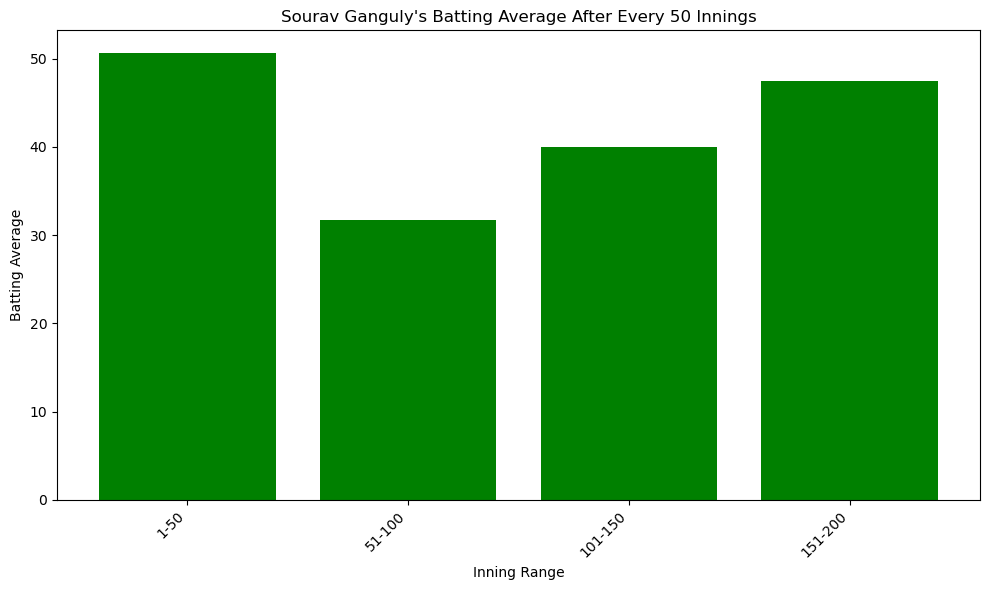

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(averages_table['Inning Range'], averages_table['Batting Average'], color='green')
plt.title("Sourav Ganguly's Batting Average After Every 50 Innings")
plt.xlabel("Inning Range")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

   Inning  Runs
0      25  1341
1      50  2281
2      75  2850
3     100  3676
4     125  4702
5     150  5597
6     175  6815


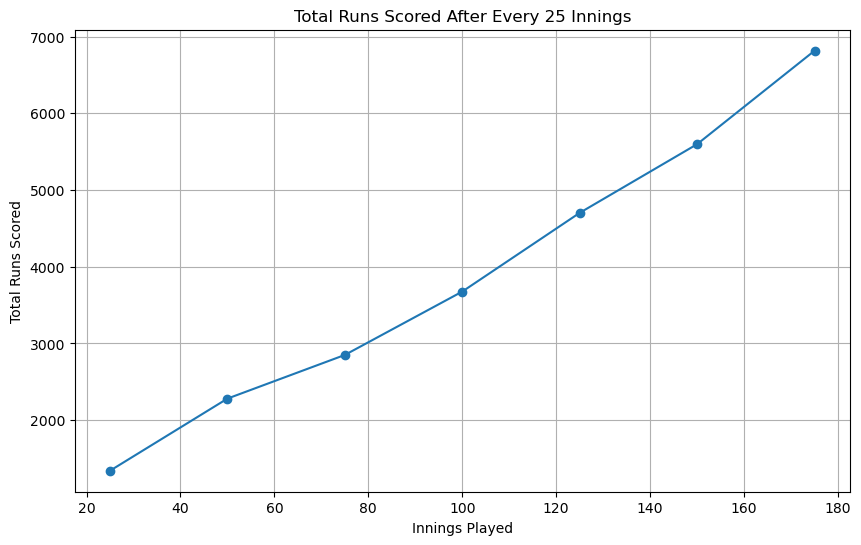

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the innings and total runs
innings_played = []
total_runs_scored = []

# Initializing variables for the cumulative sum
cumulative_runs = 0
innings_counter = 0

# Iterating through the DataFrame to calculate total runs after every 25 innings
for index, row in df.iterrows():
    innings_counter += 1
    cumulative_runs += row['Runs']
    
    # Check if 25 innings have been completed
    if innings_counter % 25 == 0:
        innings_played.append(innings_counter)
        total_runs_scored.append(cumulative_runs)

# Creating a DataFrame from the lists
totals_df = pd.DataFrame({'Inning': innings_played, 'Runs': total_runs_scored})

print(totals_df)

# Creating a line graph to visualize total runs scored after every 25 innings
plt.figure(figsize=(10, 6))
plt.plot(totals_df['Inning'], totals_df['Runs'], marker='o', linestyle='-')
plt.title("Total Runs Scored After Every 25 Innings")
plt.xlabel("Innings Played")
plt.ylabel("Total Runs Scored")
plt.grid(True)
plt.show()


  Innings Interval  Runs
0             1-25  1341
1            26-50   940
2            51-75   569
3           76-100   826
4          101-125  1026
5          126-150   895
6          151-175  1218


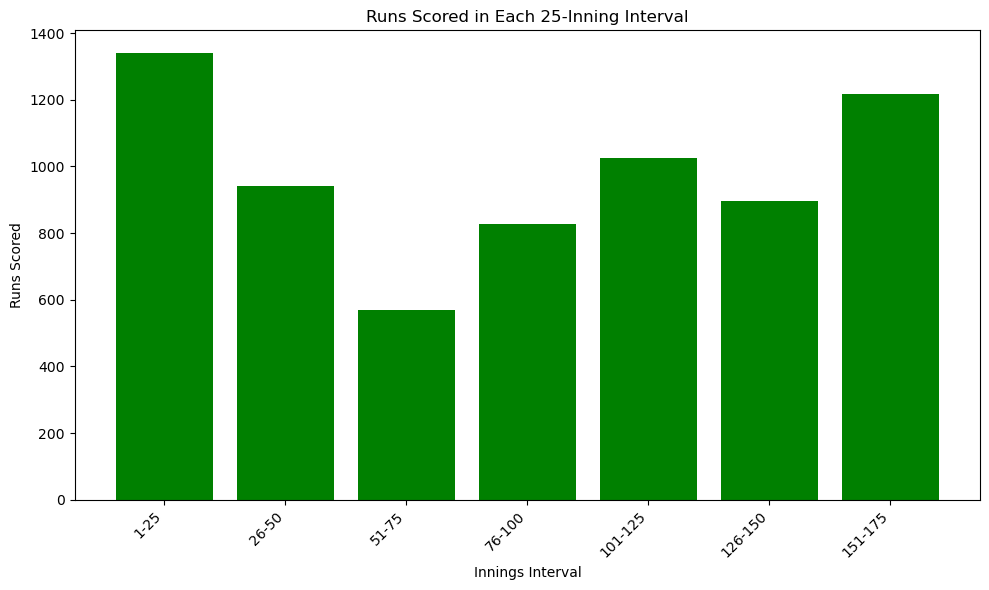

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the intervals and runs scored in each interval
innings_intervals = []
runs_in_interval = []

# Initializing variables for tracking the interval
interval_start = 1
interval_end = 25
interval_runs = 0

# Iterating through the DataFrame to calculate runs scored in each 25-inning interval
for index, row in df.iterrows():
    innings_played = row['Inning']
    runs_scored = row['Runs']
    
    if innings_played >= interval_start and innings_played <= interval_end:
        interval_runs += runs_scored
    
    # Check if 25 innings have been completed
    if innings_played == interval_end:
        innings_intervals.append(f"{interval_start}-{interval_end}")
        runs_in_interval.append(interval_runs)
        
        # Update interval variables
        interval_start = interval_end + 1
        interval_end += 25
        interval_runs = 0

# Creating a DataFrame from the lists
interval_df = pd.DataFrame({'Innings Interval': innings_intervals, 'Runs': runs_in_interval})

print(interval_df)

plt.figure(figsize=(10, 6))
plt.bar(interval_df['Innings Interval'], interval_df['Runs'], color='green')
plt.title("Runs Scored in Each 25-Inning Interval")
plt.xlabel("Innings Interval")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
